Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library('tidymodels')

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.5      ✔ recipes      1.0.10
✔ dials        1.2.1      ✔ rsample      1.2.1 
✔ dplyr        1.1.4      ✔ tibble       3.2.1 
✔ ggplot2      3.5.1      ✔ tidyr        1.3.1 
✔ infer        1.0.7      ✔ tune         1.2.1 
✔ modeldata    1.3.0      ✔ workflows    1.1.4 
✔ parsnip      1.2.1      ✔ workflowsets 1.1.0 
✔ purrr        1.0.2      ✔ yardstick    1.3.1 

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
glimpse(diabetes_train)
tail(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 1, 5, 3, 8, 1, 5, 3, 6, 10, 4, 11, 3, 7, 7…
$ Glucose                  <dbl> 85, 89, 116, 126, 99, 97, 117, 88, 92, 122, 1…
$ BloodPressure            <dbl> 66, 66, 74, 88, 84, 66, 92, 58, 92, 78, 60, 7…
$ SkinThickness            <dbl> 29, 23, 0, 41, 0, 15, 0, 11, 0, 31, 33, 0, 25…
$ Insulin                  <dbl> 0, 94, 0, 235, 0, 140, 0, 54, 0, 0, 192, 0, 7…
$ BMI                      <dbl> 26.6, 28.1, 25.6, 39.3, 35.4, 23.2, 34.1, 24.…
$ DiabetesPedigreeFunction <dbl> 0.351, 0.167, 0.201, 0.704, 0.388, 0.487, 0.3…
$ Age                      <dbl> 31, 21, 30, 27, 50, 22, 38, 22, 28, 45, 33, 3…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
4,136,70,0,0,31.2,1.182,22,1
0,181,88,44,510,43.3,0.222,26,1
8,154,78,32,0,32.4,0.443,45,1
1,128,88,39,110,36.5,1.057,37,1
0,123,72,0,0,36.3,0.258,52,1
6,190,92,0,0,35.5,0.278,66,1


❓ Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

## The variable "Outcome" is suitable as our outcome in the logistic regression model because it is either 1 or 0.

❓ Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test            |
| BMI         | Body mass index (weight in kg/(height in m)^2)            |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

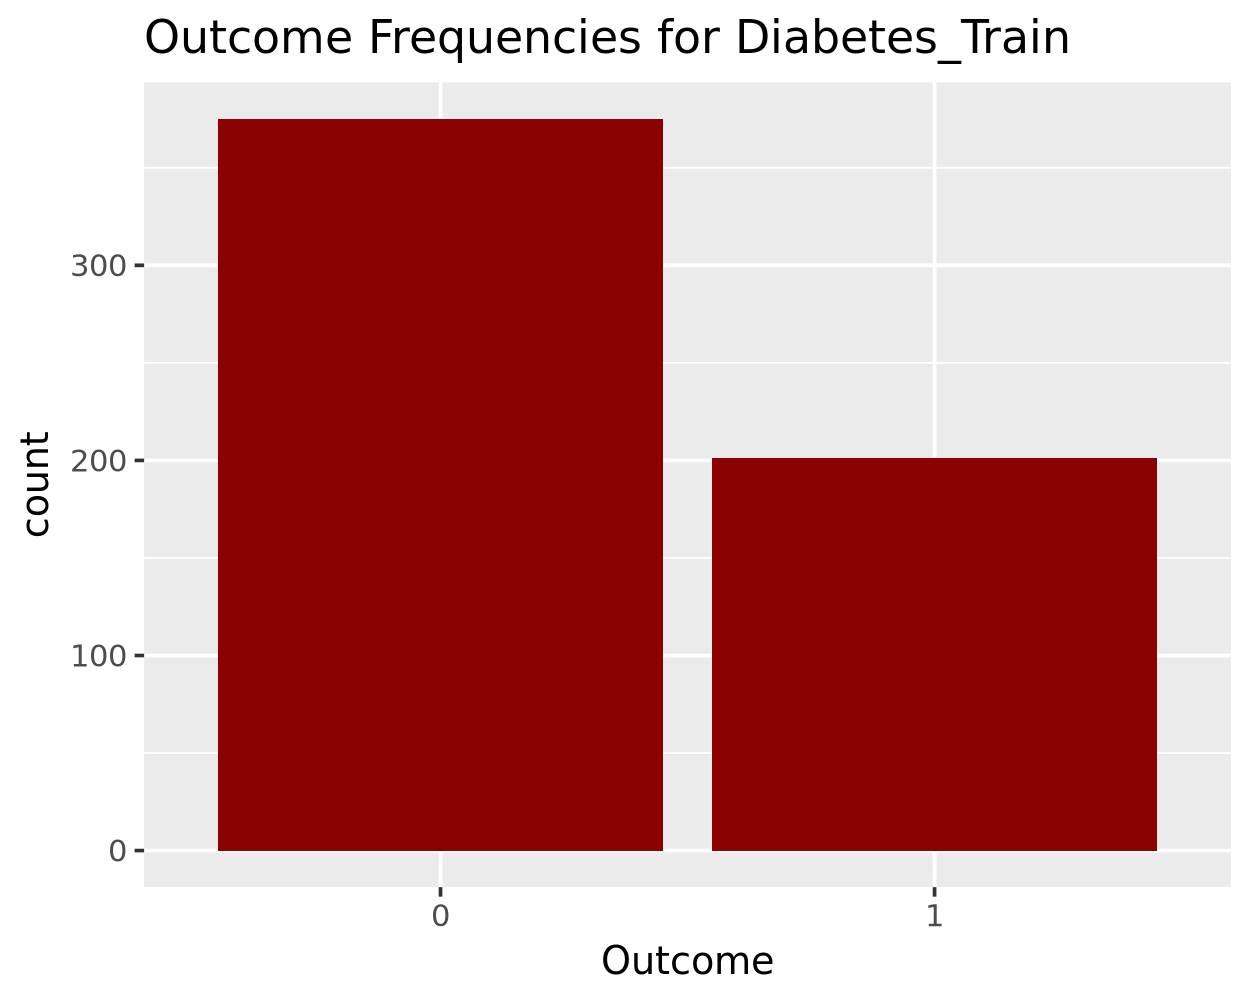

In [4]:
ggplot(data = diabetes_train) + 
  geom_bar(mapping = aes(x = Outcome), fill = 'darkred') +
    ggtitle("Outcome Frequencies for Diabetes_Train")

❓ Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

## No we have about 200 counts of 1 vs over 300 counts of 0.

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [5]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,85.0
0,BMI,26.6
0,Glucose,89.0
0,BMI,28.1
0,Glucose,116.0
0,BMI,25.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

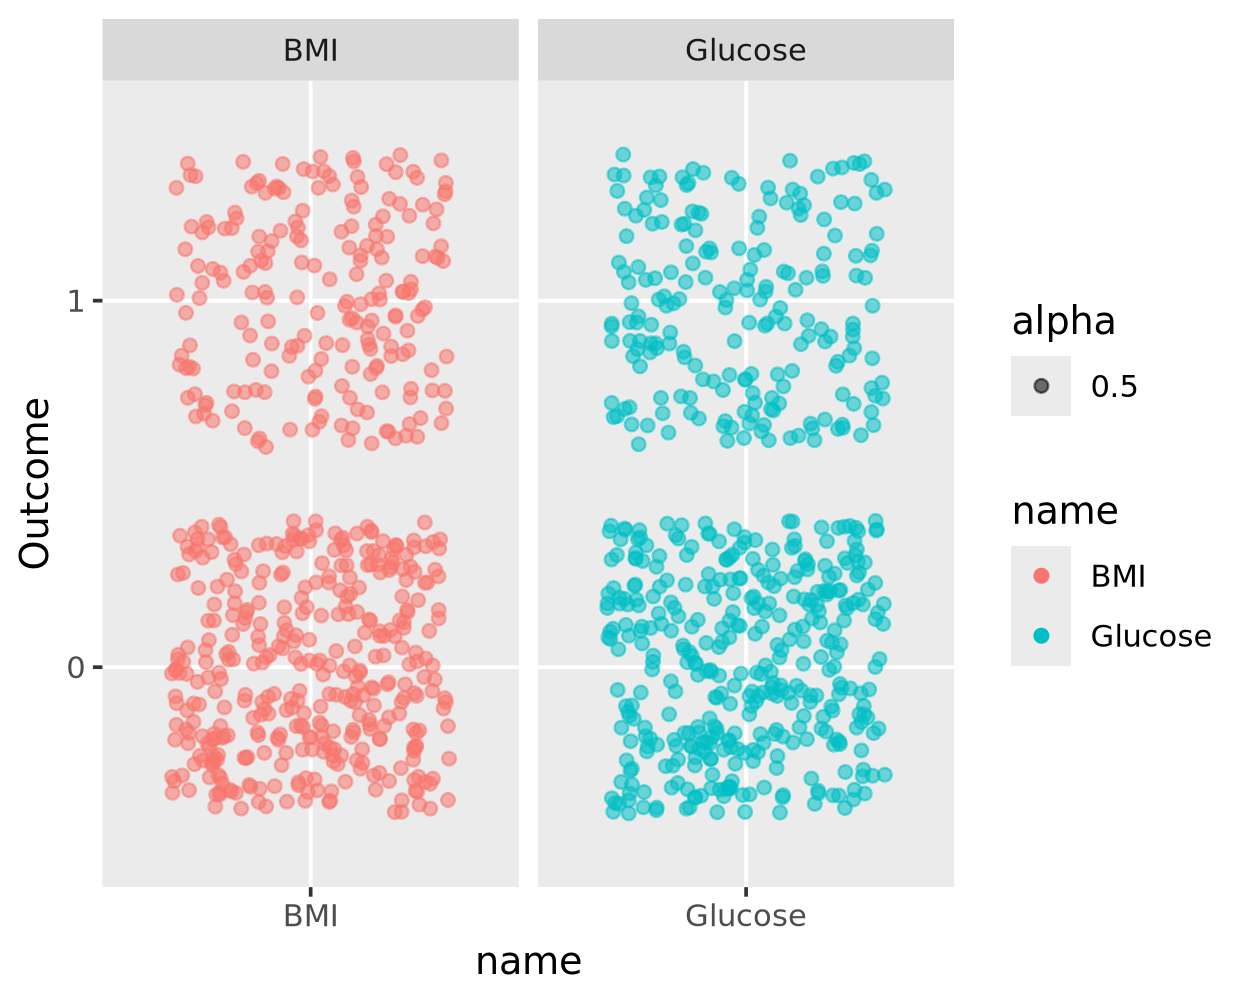

In [35]:
ggplot(data = plot_df) +
    geom_jitter(mapping = aes(x = name , y = Outcome, color = name, alpha = .5)) +
    facet_wrap(~name, ncol = 2, scales = 'free_x')

❓ What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

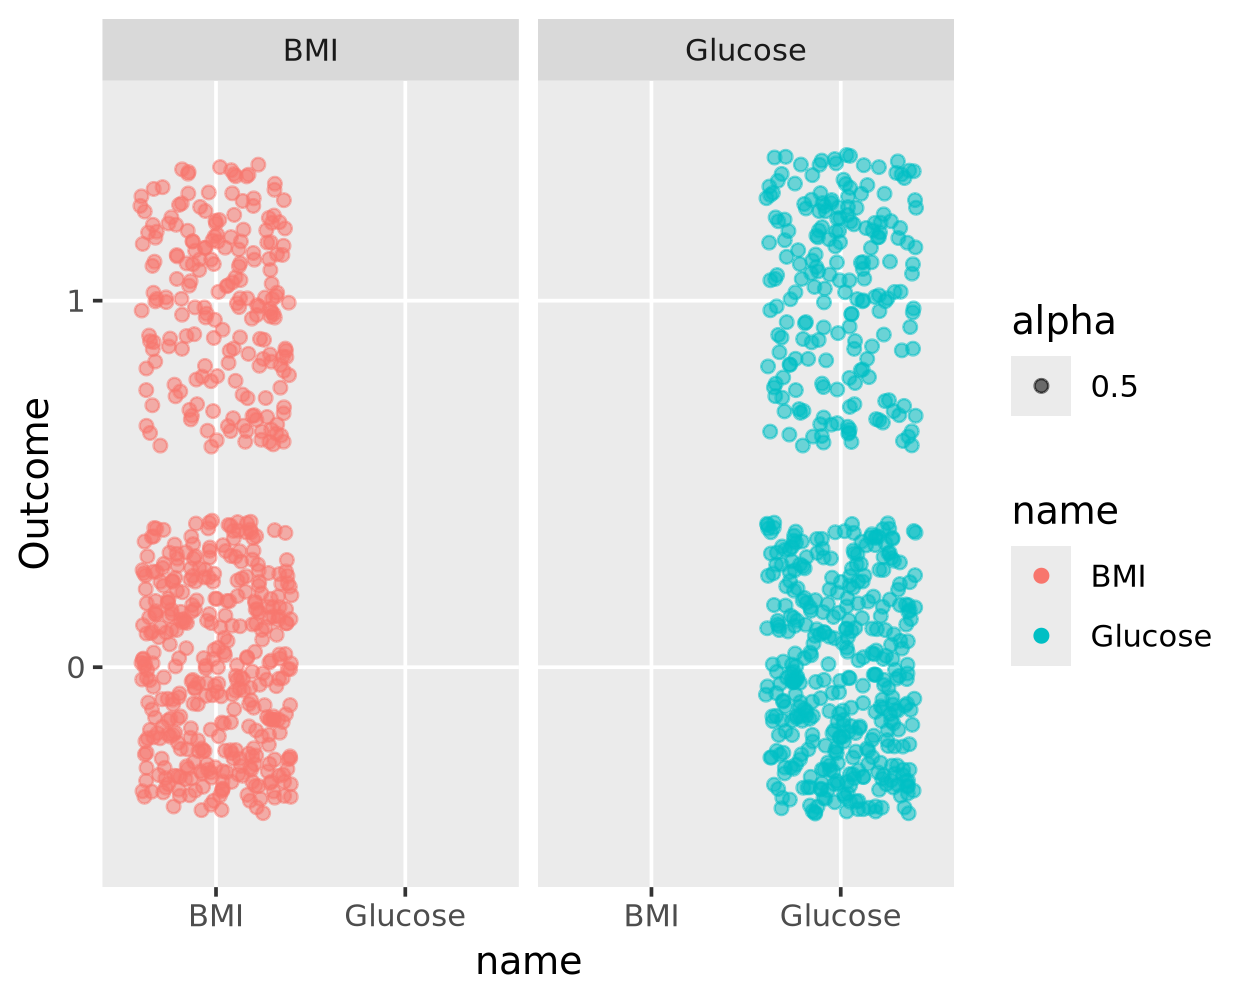

In [37]:
ggplot(data = plot_df) +
    geom_jitter(mapping = aes(x = name , y = Outcome, color = name, alpha = .5)) +
    facet_wrap(~name, ncol = 2)

## Shows the dummy variable/ value. Without scales = 'free_x' the information displayed is kind of redundant since we know that the points are already seperated based on their 'name' value I do not need to see that when it is in BMI that there are no points for glucose.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [38]:
mod = logistic_reg() |> set_engine('glm')
mod_fit = mod |> fit(Outcome ~ BMI + Glucose, diabetes_train)

tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.33919075,0.680288443,-10.788351,3.907360e-27
BMI,0.08047385,0.015252300,5.276178,1.319060e-07
Glucose,0.03297822,0.003722792,8.858467,8.112251e-19


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [48]:
diabetes_test_wPred = augment(mod_fit, diabetes_test)

glimpse(diabetes_test_wPred)


Rows: 192
Columns: 12
$ .pred_class              <fct> 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, …
$ .pred_0                  <dbl> 0.6695096, 0.6650251, 0.2211190, 0.6397723, 0…
$ .pred_1                  <dbl> 0.330490378, 0.334974882, 0.778881009, 0.3602…
$ Pregnancies              <dbl> 10, 4, 10, 10, 1, 7, 0, 1, 13, 5, 3, 4, 0, 1,…
$ Glucose                  <dbl> 115, 110, 168, 139, 189, 100, 118, 103, 145, …
$ BloodPressure            <dbl> 0, 92, 74, 80, 60, 0, 84, 30, 82, 75, 76, 72,…
$ SkinThickness            <dbl> 0, 0, 0, 0, 23, 0, 47, 38, 19, 26, 36, 47, 39…
$ Insulin                  <dbl> 0, 0, 0, 0, 846, 0, 230, 83, 110, 0, 245, 207…
$ BMI                      <dbl> 35.3, 37.6, 38.0, 27.1, 30.1, 30.0, 45.8, 43.…
$ DiabetesPedigreeFunction <dbl> 0.134, 0.191, 0.537, 1.441, 0.398, 0.484, 0.5…
$ Age                      <dbl> 29, 30, 34, 57, 59, 32, 31, 33, 57, 60, 28, 5…
$ Outcome                  <fct> 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, …


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [49]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 110  28
         1  15  39

❓ Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

## 1) 39 individuals actually had diabetes.
## 2) 54 in total were predicted to have diabetes.
## 3) Of the 54 in total predicted to have diabetes, 15 of them did not have diabetes.
